# Chronic Kidney Disease Analysis using Logistic Regression

# What is Chronic Kidney Disease?

Chronic Kidney Disease (CKD) is a major medical problem and can be cured if treated in the early stages. I have built a model using various concepts of machine learning such as supervised and unsupervised learning, logistic regression and many more to help patients identify this problem and start their medication at the early stage. 


# What is meant by logistic regression?

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

Logistic regression has become an important tool in the discipline of machine learning. The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data. As more relevant data comes in, the algorithm should get better at predicting classifications within data sets. Logistic regression can also play a role in data preparation activities by allowing data sets to be put into specifically predefined buckets during the extract, transform, load (ETL) process in order to stage the information for analysis.

# Things included in this notebook

I have done the following things:

1) Importing dataset

2) Data Preprocessing

3) Preparing the dataset for model training

4) Prdeicting the result

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df=pd.read_csv('dataset/chronickidneydisease.csv')
print(df)

      id   age     bp     sg   al   su       rbc        pc         pcc  \
0      0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1      1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2      2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3      3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4      4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5      5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6      6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7      7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8      8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9      9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   
10    10  50.0   60.0  1.010  2.0  4.0       NaN  abnormal     present   
11    11  63.0   70.0  1.010  3.0  0.0  abnormal  abnormal     present   
12    12  68.0   70.0  1.015  3.0  1.0

# Data Preprocessing

In [3]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
df=df.drop(['id'],axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [7]:
df['classification']=df['classification'].replace({'ckd\t':"ckd"})

In [8]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [9]:
df['age']=df['age'].round()

In [10]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [11]:
df['bp'].fillna(df['bp'].mean(),inplace=True)

In [12]:
df['sg'].fillna(0.02, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age               400 non-null float64
bp                400 non-null float64
sg                400 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane       

In [14]:
df['al'].mode()

0    0.0
dtype: float64

In [15]:
df['al'].fillna(0.0, inplace=True)

In [16]:
df['su'].unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [17]:
df['su'].mode()

0    0.0
dtype: float64

In [18]:
df['su'].fillna(0.0, inplace=True)

In [19]:
df['rbc'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [20]:
df['rbc'].mode()

0    normal
dtype: object

In [21]:
df['rbc'].fillna('normal', inplace=True)

In [22]:
df['pc'].mode()

0    normal
dtype: object

In [23]:
df['pc'].fillna('normal', inplace=True)

In [24]:
df['pcc'].mode()

0    notpresent
dtype: object

In [25]:
df['pcc'].fillna('notpresent', inplace=True)

In [26]:
df['ba'].mode()

0    notpresent
dtype: object

In [27]:
df['ba'].fillna('notpresent', inplace=True)

In [28]:
df['bgr'].fillna(df['bgr'].mean(),inplace=True)

In [29]:
df['bu'].fillna(df['bu'].mean(),inplace=True)

In [30]:
df['sc'].fillna(df['sc'].mean(),inplace=True)

In [31]:
df['sod'].fillna(df['sod'].mean(),inplace=True)

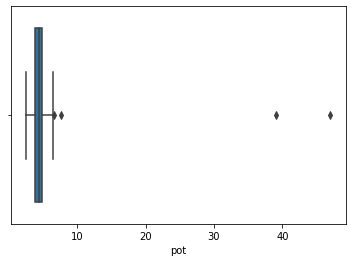

In [32]:
import seaborn as sns
sns.boxplot(df['pot'])

In [33]:
df['pot'].fillna(df['pot'].mean(),inplace=True)

In [34]:
df['hemo'].fillna(df['hemo'].mean(),inplace=True)

In [35]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [36]:
df['pcv']=df['pcv'].replace({'\t?':'nan'})

In [37]:
df['pcv']=df['pcv'].replace({'\t43':43})

In [38]:
df['pcv']=pd.to_numeric(df['pcv'],errors='coerce')
df['pcv'].dtypes

dtype('float64')

In [39]:
df['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [40]:
df['pcv'].fillna(df['pcv'].mean(),inplace=True)

In [41]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [42]:
df['wc']=df['wc'].replace({'\t6200':6200})
df['wc']=df['wc'].replace({'\t8400':8400})
df['wc']=df['wc'].replace({'\t?':'nan'})


In [43]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', 6200, '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', 8400, '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', 'nan',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [44]:
df['wc']=pd.to_numeric(df['wc'],errors='coerce').astype("float64")
df['wc'].dtypes

dtype('float64')

In [45]:
df['wc'].fillna(df['wc'].mean(),inplace=True)

In [46]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [47]:
df['rc']=df['rc'].replace({'\t?':'nan'})

In [48]:
df['rc']=pd.to_numeric(df['rc'],errors='coerce').astype("float64")
df['rc'].dtypes

dtype('float64')

In [49]:
df['rc'].fillna(df['rc'].mean(),inplace=True)

In [50]:
df['htn'].mode()

0    no
dtype: object

In [51]:
df['htn'].unique()

array(['yes', 'no', nan], dtype=object)

In [52]:
df['htn'].fillna('no', inplace=True)

In [53]:
df['dm'].mode()

0    no
dtype: object

In [54]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [55]:
df['dm']=df['dm'].replace({'\tno':'no'})

In [56]:
df['dm']=df['dm'].replace({'\tyes':'yes'})

In [57]:
df['dm']=df['dm'].replace({' yes':'yes'})

In [58]:
df['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [59]:
df['dm'].fillna('no', inplace=True)

In [60]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [61]:
df['cad']=df['cad'].replace({'\tno':'no'})

In [62]:
df['cad'].mode()

0    no
dtype: object

In [63]:
df['cad'].fillna('no', inplace=True)

In [64]:
df['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [65]:
df['appet'].mode()

0    good
dtype: object

In [66]:
df['appet'].fillna('good', inplace=True)

In [67]:
df['pe'].unique()

array(['no', 'yes', nan], dtype=object)

In [68]:
df['pe'].mode()

0    no
dtype: object

In [69]:
df['pe'].fillna('no', inplace=True)

In [70]:
df['ane'].unique()

array(['no', 'yes', nan], dtype=object)

In [71]:
df['ane'].mode()

0    no
dtype: object

In [72]:
df['ane'].fillna('no', inplace=True)

In [73]:
df.isnull().any()

age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

# Final Dataset 

In [74]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.000000,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.000000,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.000000,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.000000,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.000000,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.000000,...,39.000000,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,36.000000,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.000000,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.000000,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.000000,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


# Preparing the dataset for model training

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [76]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[5,6,7,8,18,19,20,21,22,23,24])],remainder='passthrough')
df=ct.fit_transform(df)
df

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.40000000e+01, 7.80000000e+03, 5.20000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.80000000e+01, 6.00000000e+03, 4.70743494e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.10000000e+01, 7.50000000e+03, 4.70743494e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.90000000e+01, 6.60000000e+03, 5.40000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.10000000e+01, 7.20000000e+03, 5.90000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.30000000e+01, 6.80000000e+03, 6.10000000e+00]])

In [77]:
from scipy import stats
stats.zscore(df)

array([[ 3.64889676e-01,  4.84322105e-01, -3.42517789e-01, ...,
         6.28371583e-01, -2.40518675e-01,  5.86901724e-01],
       [ 3.64889676e-01,  4.84322105e-01, -3.42517789e-01, ...,
        -1.08648919e-01, -9.54786256e-01,  1.05828345e-15],
       [ 3.64889676e-01,  4.84322105e-01, -3.42517789e-01, ...,
        -9.68506171e-01, -3.59563272e-01,  1.05828345e-15],
       ...,
       [ 3.64889676e-01,  4.84322105e-01, -3.42517789e-01, ...,
         1.24255533e+00, -7.16697062e-01,  8.25205970e-01],
       [ 3.64889676e-01,  4.84322105e-01, -3.42517789e-01, ...,
         1.48822884e+00, -4.78607869e-01,  1.42096659e+00],
       [ 3.64889676e-01,  4.84322105e-01, -3.42517789e-01, ...,
         1.73390234e+00, -6.37333998e-01,  1.65927083e+00]])

In [78]:
z=np.abs(stats.zscore(df))
z

array([[3.64889676e-01, 4.84322105e-01, 3.42517789e-01, ...,
        6.28371583e-01, 2.40518675e-01, 5.86901724e-01],
       [3.64889676e-01, 4.84322105e-01, 3.42517789e-01, ...,
        1.08648919e-01, 9.54786256e-01, 1.05828345e-15],
       [3.64889676e-01, 4.84322105e-01, 3.42517789e-01, ...,
        9.68506171e-01, 3.59563272e-01, 1.05828345e-15],
       ...,
       [3.64889676e-01, 4.84322105e-01, 3.42517789e-01, ...,
        1.24255533e+00, 7.16697062e-01, 8.25205970e-01],
       [3.64889676e-01, 4.84322105e-01, 3.42517789e-01, ...,
        1.48822884e+00, 4.78607869e-01, 1.42096659e+00],
       [3.64889676e-01, 4.84322105e-01, 3.42517789e-01, ...,
        1.73390234e+00, 6.37333998e-01, 1.65927083e+00]])

In [79]:
threshold=3
np.where(z>threshold)

(array([  2,   6,   6,   7,   7,  10,  10,  11,  12,  13,  14,  14,  18,
         19,  20,  21,  21,  21,  24,  27,  27,  29,  34,  48,  49,  53,
         54,  56,  56,  57,  58,  61,  61,  61,  67,  69,  70,  73,  76,
         84,  86,  90,  90,  92,  92,  93,  96,  98,  99,  99, 101, 103,
        107, 111, 120, 122, 123, 128, 130, 130, 130, 133, 139, 140, 143,
        145, 145, 145, 145, 148, 153, 155, 156, 158, 158, 160, 168, 170,
        170, 176, 180, 181, 184, 189, 190, 190, 193, 195, 195, 198, 199,
        201, 210, 211, 212, 213, 225, 225, 225, 226, 231, 233, 235, 236,
        238, 242, 242, 244, 245, 246, 246, 248, 248, 249, 249, 249, 249],
       dtype=int64),
 array([16, 18, 19, 15, 16, 15, 16, 16,  6,  6,  3,  6,  6,  6,  6,  6, 18,
        19,  3,  6, 15,  6,  3, 23, 23, 15,  6,  6, 15,  6,  6, 17, 18, 20,
        16, 15, 15, 22,  3, 24, 16,  3,  6,  3,  6,  6,  6, 12, 12, 15,  3,
        17, 15,  6,  6, 17,  3, 20,  3, 17, 23, 24,  3, 15, 15,  3,  6, 14,
        17, 18, 1

In [80]:
dfg=pd.DataFrame(df)

In [81]:
df_no_out=dfg[(z<threshold).all(axis=1)]
df_no_out

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,121.000000,36.000000,1.200000,137.528754,4.627244,15.400000,44.000000,7800.000000,5.200000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,148.036517,18.000000,0.800000,137.528754,4.627244,11.300000,38.000000,6000.000000,4.707435
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,32.000000,6700.000000,3.900000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,106.000000,26.000000,1.400000,137.528754,4.627244,11.600000,35.000000,7300.000000,4.600000
5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,74.000000,25.000000,1.100000,142.000000,3.200000,12.200000,39.000000,7800.000000,4.400000
8,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,138.000000,60.000000,1.900000,137.528754,4.627244,10.800000,33.000000,9600.000000,4.000000
9,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,70.000000,107.000000,7.200000,114.000000,3.700000,9.500000,29.000000,12100.000000,3.700000
15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,76.000000,162.000000,9.600000,141.000000,4.900000,7.600000,24.000000,3800.000000,2.800000
16,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,99.000000,46.000000,2.200000,138.000000,4.100000,12.600000,38.884498,8406.122449,4.707435
17,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,114.000000,87.000000,5.200000,139.000000,3.700000,12.100000,38.884498,8406.122449,4.707435


In [82]:
df_no_out.iloc[:,0:17]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,48.000000,80.0,1.020,1.0,0.0,121.000000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,50.0,1.020,4.0,0.0,148.036517
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,48.000000,70.0,1.005,4.0,0.0,117.000000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.000000,80.0,1.010,2.0,0.0,106.000000
5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,60.000000,90.0,1.015,3.0,0.0,74.000000
8,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,52.000000,100.0,1.015,3.0,0.0,138.000000
9,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,53.000000,90.0,1.020,2.0,0.0,70.000000
15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.000000,80.0,1.015,3.0,0.0,76.000000
16,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.000000,70.0,1.015,2.0,0.0,99.000000
17,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,47.000000,80.0,0.020,0.0,0.0,114.000000


In [83]:
titles=list(df_no_out.columns)
titles

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [84]:
titles[10],titles[24]=titles[24],titles[10]
titles

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 24,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 10]

In [85]:
df_no_out=df_no_out[titles]
df_no_out

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,10
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,121.000000,36.000000,1.200000,137.528754,4.627244,15.400000,44.000000,7800.000000,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,148.036517,18.000000,0.800000,137.528754,4.627244,11.300000,38.000000,6000.000000,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,32.000000,6700.000000,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,106.000000,26.000000,1.400000,137.528754,4.627244,11.600000,35.000000,7300.000000,0.0
5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,74.000000,25.000000,1.100000,142.000000,3.200000,12.200000,39.000000,7800.000000,0.0
8,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,138.000000,60.000000,1.900000,137.528754,4.627244,10.800000,33.000000,9600.000000,0.0
9,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,70.000000,107.000000,7.200000,114.000000,3.700000,9.500000,29.000000,12100.000000,0.0
15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,76.000000,162.000000,9.600000,141.000000,4.900000,7.600000,24.000000,3800.000000,0.0
16,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,99.000000,46.000000,2.200000,138.000000,4.100000,12.600000,38.884498,8406.122449,0.0
17,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,114.000000,87.000000,5.200000,139.000000,3.700000,12.100000,38.884498,8406.122449,0.0


In [86]:
x=df_no_out.iloc[:,0:23].values
y=df_no_out.iloc[:,-1].values

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.30725493,  0.34908996, -0.23210354, ...,  0.40928056,
         0.9127631 ,  0.44590944],
       [ 0.30725493,  0.34908996, -0.23210354, ...,  0.40928056,
        -0.73489813, -0.38778348],
       [ 0.30725493, -2.86459113,  4.30842198, ..., -2.97471255,
        -0.77508499, -1.2214764 ],
       ...,
       [ 0.30725493,  0.34908996, -0.23210354, ...,  0.04778423,
         1.07351053,  1.14065354],
       [ 0.30725493,  0.34908996, -0.23210354, ...,  0.84317812,
         0.43052079,  1.41855118],
       [ 0.30725493,  0.34908996, -0.23210354, ..., -1.38392477,
         1.07351053,  1.69644882]])

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Using Logisitc Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr=LogisticRegression()

In [92]:
lr.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the result

In [93]:
y_pred=lr.predict(x_test)
y_pred

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.])

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9841269841269841

# Hope this helps you to understand Logistic Regression and help you to apply this to your projects.